In [1]:
from pathlib import Path

import graphviz
import joblib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import tree

In [2]:
PATH = Path("results/prunned_tree")
PATH.mkdir(exist_ok=True)

In [3]:
df = pd.read_csv("data/final_train.csv", index_col=0)
df.head()

,Activity,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyAccMean,gravity)","angle(tBodyGyroJerkMean,gravityMean)","angle(tBodyGyroMean,gravityMean)",energy-mean(),"fBodyAcc-bandsEnergy()-1,16",...,tGravityAccMag-energy(),tGravityAccMag-entropy(),tGravityAccMag-iqr(),tGravityAccMag-mad(),tGravityAccMag-max(),tGravityAccMag-mean(),tGravityAccMag-min(),tGravityAccMag-sma(),tGravityAccMag-std(),void()
0,STANDING,-1.574191,-0.805700,-2.453831,-1.861714,0.115517,-2.023369,3.125860,-9.474436,3.622600,...,5.049130,3.272281,5.103018,-0.823302,3.063681,-0.928676,-1.007695,3.094236,1.669987,1.0
1,WALKING_UPSTAIRS,-1.568669,-0.612620,-2.488338,-1.751117,0.218134,0.280294,7.953403,-0.679894,2.512880,...,4.565443,4.440779,3.288399,-2.689605,1.705341,-0.822617,-0.572410,-2.187890,-0.544652,2.0
2,LAYING,-1.548333,-0.139628,-2.380889,-1.915239,0.067613,-0.887342,6.007361,-11.906904,3.621984,...,5.059609,2.296603,5.344174,-0.549843,3.272225,-0.940610,-1.031522,-2.071755,2.024442,3.0
3,WALKING,-1.574094,-0.793443,-2.449959,-1.842741,-0.195625,-0.950671,2.104353,-11.906121,3.355701,...,4.860758,4.177535,3.950012,-0.322642,2.366287,-0.866937,-0.696431,1.863375,0.550414,2.0
4,LAYING,-1.548333,-0.139628,-2.380889,NaN,0.067613,-0.887342,6.007361,-11.970485,3.621984,...,5.059609,2.296603,5.344174,-0.549843,3.272225,-0.940610,-1.031522,-2.102513,2.024442,3.0


# Data preprocessing

In [4]:
df = df.drop(columns=["subject", "void()"])
df = df.dropna()

In [5]:
y = df["Activity"]
X = df.drop(columns=["Activity"])

# Loading prunned tree

In [6]:
prunned_tree_clf = joblib.load("results/prunned_tree/prunned_tree.joblib")

# Visualisation

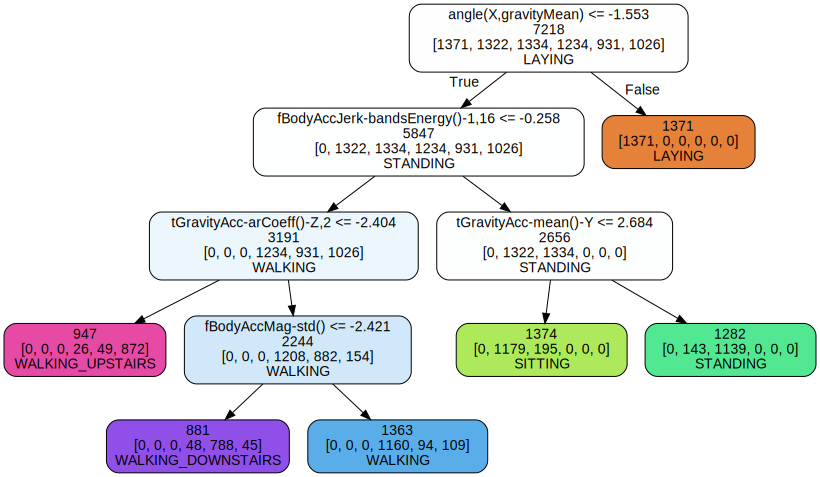

In [7]:
dot_data = tree.export_graphviz(
    prunned_tree_clf,
    feature_names=X.columns,
    class_names=prunned_tree_clf.classes_,
    label="none",
    filled=True,
    impurity=False,
    rounded=True
)
graph = graphviz.Source(dot_data)
graph

# Explaination

## 1. LAYING / NOT LAYING

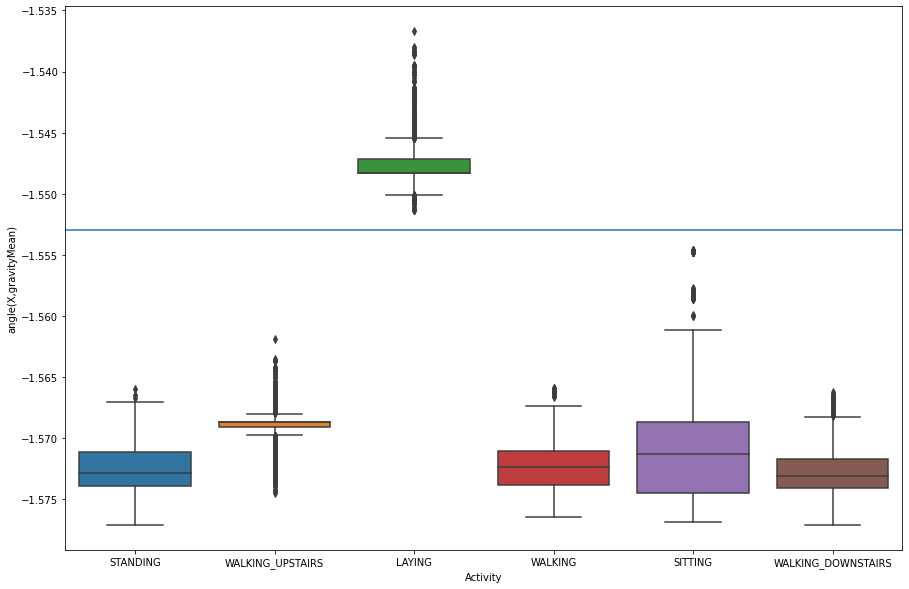

In [8]:
laying_feature = X.columns[prunned_tree_clf.tree_.feature[0]]
laying_threshold = prunned_tree_clf.tree_.threshold[0]

fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(y=laying_feature, x=df["Activity"], data=X, ax=ax)
ax.hlines(laying_threshold, *ax.get_xlim())

plt.show()

# 2. Second split

In [9]:
second_df = df[X[laying_feature] <= laying_threshold]

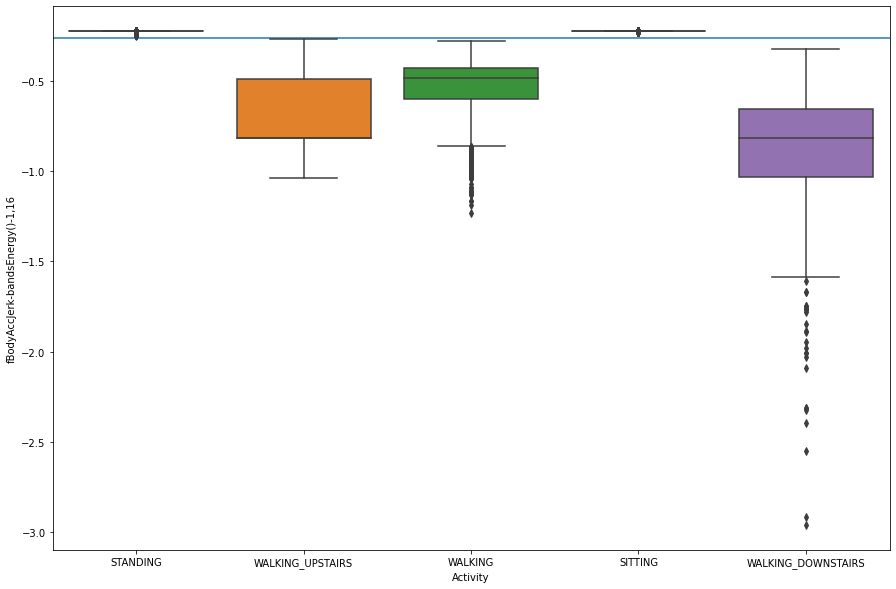

In [10]:
second_feature = X.columns[prunned_tree_clf.tree_.feature[1]]
second_threshold = prunned_tree_clf.tree_.threshold[1]

fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(y=second_feature, x="Activity", data=second_df, ax=ax)
ax.hlines(second_threshold, *ax.get_xlim())

plt.show()

## 3. SITTING / STANDING

In [11]:
sit_stand_df = second_df[second_df[second_feature] > second_threshold]

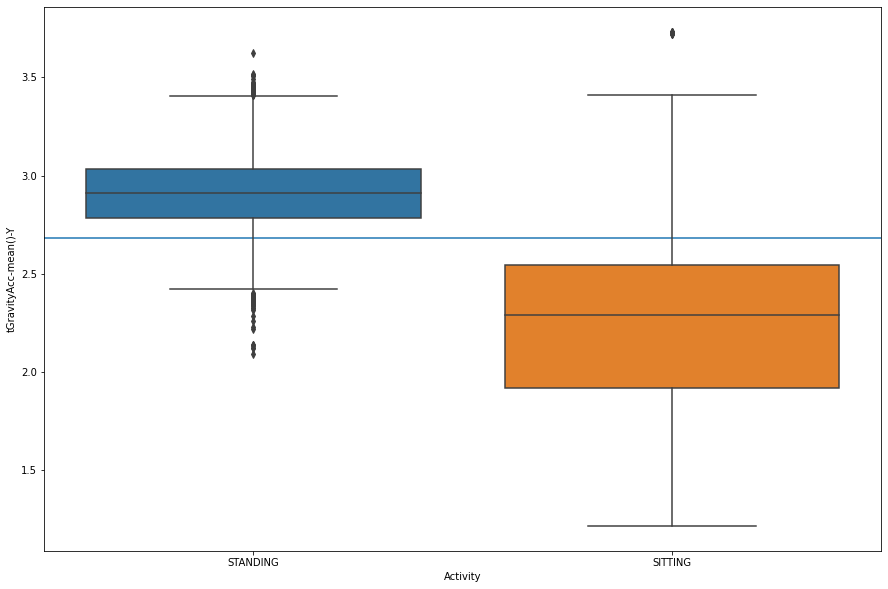

In [12]:
feature = X.columns[prunned_tree_clf.tree_.feature[7]]
threshold = prunned_tree_clf.tree_.threshold[7]

fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(y=feature, x="Activity", data=sit_stand_df, ax=ax)
ax.hlines(threshold, *ax.get_xlim())

plt.show()

## 4. WALKING_UPSTAIRS

In [13]:
walking_all_df = second_df[second_df[second_feature] <= second_threshold]

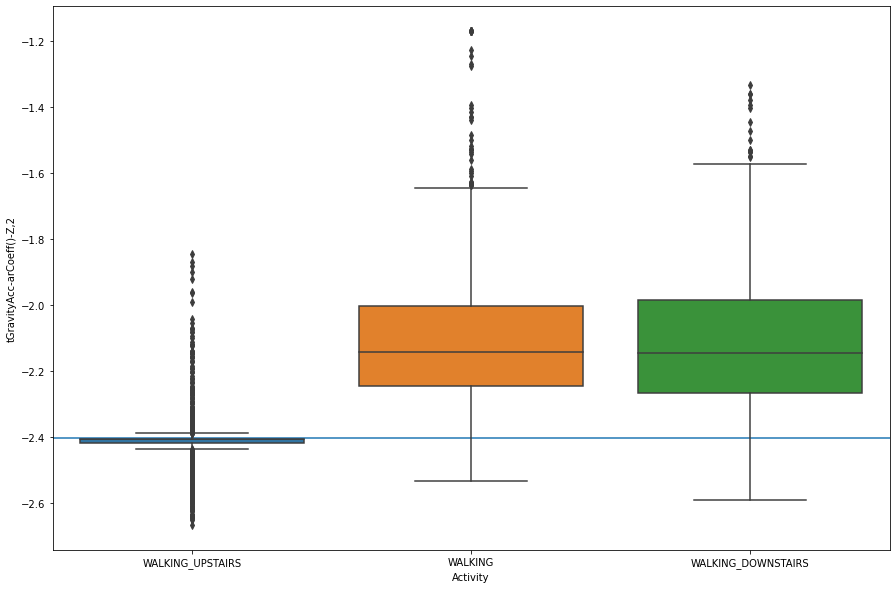

In [14]:
upstairs_feature = X.columns[prunned_tree_clf.tree_.feature[2]]
upstairs_threshold = prunned_tree_clf.tree_.threshold[2]

fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(y=upstairs_feature, x="Activity", data=walking_all_df, ax=ax)
ax.hlines(upstairs_threshold, *ax.get_xlim())

plt.show()

## 5. WALKING / WALKING_DOWNSTAIRS

In [15]:
last_df = walking_all_df[walking_all_df[upstairs_feature] <= upstairs_threshold]

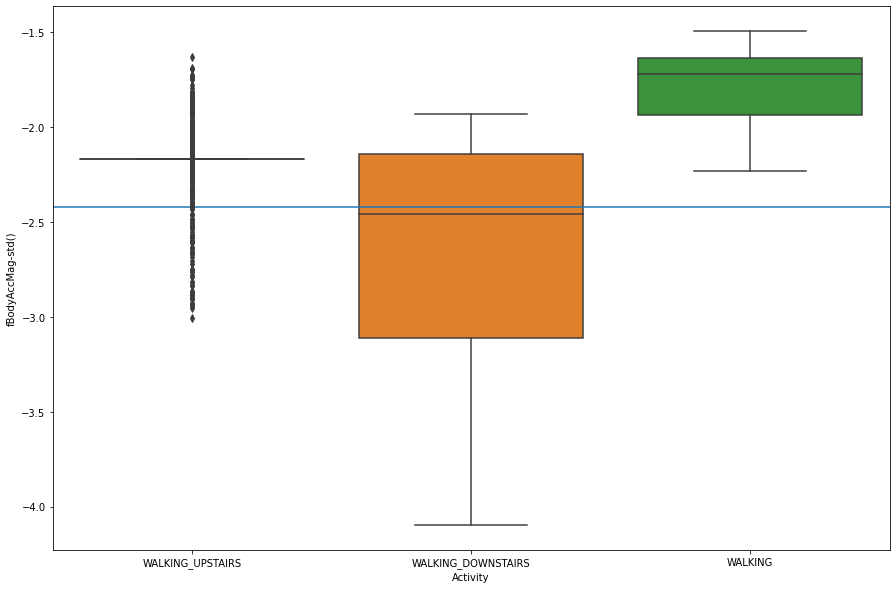

In [16]:
last_feature = X.columns[prunned_tree_clf.tree_.feature[4]]
last_threshold = prunned_tree_clf.tree_.threshold[4]

fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(y=last_feature, x="Activity", data=last_df, ax=ax)
ax.hlines(last_threshold, *ax.get_xlim())

plt.show()